In [1]:
Reps = ['houston', 'paris', 'singapore']
Ops = ['insert', 'read', 'update']
service_time = {'insert':0, 'read':0, 'update':0}
lock_cost = {'X': {'houston':{'houston':3.2954730850000002, 'paris':223.78096148900002, 'singapore':503.93539986400003}, 
                     'paris':{'houston':223.99058557599997, 'paris':3.2398566490000005, 'singapore':303.88539813499995}, 
                     'singapore':{'houston':503.86683250899995, 'paris':303.965657338, 'singapore':3.108215382}},
             'S': {'houston':{'houston':3.0035555910000005, 'paris':223.53921476500003, 'singapore':503.69265980899996}, 
                     'paris':{'houston':223.67417935400002, 'paris':3.0147095129999997, 'singapore':303.628741349}, 
                     'singapore':{'houston':503.62028737099996, 'paris':303.671423894, 'singapore':2.9168805460000002}}
            }
freq = {'workloadeqeq':{'insert':{'houston':111, 'paris':111, 'singapore':111}, 
                        'read':{'houston':111, 'paris':111, 'singapore':111},
                       'update':{'houston':111, 'paris':111, 'singapore':111}},
       'workloadeqhot':{'insert':{'houston':0, 'paris':333, 'singapore':0}, 
                        'read':{'houston':0, 'paris':333, 'singapore':0},
                       'update':{'houston':0, 'paris':333, 'singapore':0}},
        'workloadeqclust':{'insert':{'houston':167, 'paris':167, 'singapore':0}, 
                           'read':{'houston':167, 'paris':167, 'singapore':0},
                          'update':{'houston':167, 'paris':167, 'singapore':0}},
        'workloadabceq':{'insert':{'houston':303, 'paris':303, 'singapore':303}, 
                     'read':{'houston':25, 'paris':25, 'singapore':25},
                    'update':{'houston':0, 'paris':0, 'singapore':0}},
        'workloadabchot':{'insert':{'houston':0, 'paris':909, 'singapore':0}, 
                      'read':{'houston':0, 'paris':75, 'singapore':0},
                     'update':{'houston':0, 'paris':15, 'singapore':0}},
        'workloadabcclust':{'insert':{'houston':455, 'paris':455, 'singapore':0}, 
                    'read':{'houston':37, 'paris':37, 'singapore':0},
                   'update':{'houston':8, 'paris':8, 'singapore':0}},
        'workloadbaceq':{'insert':{'houston':25, 'paris':25, 'singapore':25}, 
                     'read':{'houston':303, 'paris':303, 'singapore':303},
                    'update':{'houston':0, 'paris':0, 'singapore':0}},
        'workloadbachot':{'insert':{'houston':0, 'paris':75, 'singapore':0}, 
                      'read':{'houston':0, 'paris':909, 'singapore':0},
                     'update':{'houston':0, 'paris':15, 'singapore':0}},
        'workloadbacclust':{'insert':{'houston':37, 'paris':37, 'singapore':0}, 
                    'read':{'houston':455, 'paris':455, 'singapore':0},
                   'update':{'houston':8, 'paris':8, 'singapore':0}}
       }


Locks = {1:{'a-b':{'insert', 'read'}, 'b-c':{'read', 'update'}},
         2:{'a-b-c':{'insert', 'read', 'update'}}}

modes = {1:{1:{'insert':{'a-b':'X'}, 'read':{'a-b':'X', 'b-c':'X'}, 'update':{'b-c':'X'}}, 
             2:{'insert':{'a-b':'X'}, 'read':{'a-b':'X', 'b-c':'X'}, 'update':{'b-c':'S'}},
             3:{'insert':{'a-b':'X'}, 'read':{'a-b':'X', 'b-c':'S'}, 'update':{'b-c':'X'}},
             4:{'insert':{'a-b':'X'}, 'read':{'a-b':'S', 'b-c':'X'}, 'update':{'b-c':'X'}},
             5:{'insert':{'a-b':'X'}, 'read':{'a-b':'S', 'b-c':'X'}, 'update':{'b-c':'S'}},
             6:{'insert':{'a-b':'X'}, 'read':{'a-b':'S', 'b-c':'S'}, 'update':{'b-c':'X'}},
             7:{'insert':{'a-b':'S'}, 'read':{'a-b':'X', 'b-c':'X'}, 'update':{'b-c':'X'}},
             8:{'insert':{'a-b':'S'}, 'read':{'a-b':'X', 'b-c':'X'}, 'update':{'b-c':'S'}},
             9:{'insert':{'a-b':'S'}, 'read':{'a-b':'X', 'b-c':'S'}, 'update':{'b-c':'X'}}},
         2:{1:{'insert':{'a-b-c':'X'}, 'read':{'a-b-c':'X'}, 'update':{'a-b-c':'X'}},
             2:{'insert':{'a-b-c':'X'}, 'read':{'a-b-c':'S'}, 'update':{'a-b-c':'X'}},
             3:{'insert':{'a-b-c':'S'}, 'read':{'a-b-c':'X'}, 'update':{'a-b-c':'S'}}}
        }
place = {1:{1:{'a-b':'houston', 'b-c':'houston'},
             2:{'a-b':'paris', 'b-c':'houston'},
             3:{'a-b':'singapore', 'b-c':'houston'},
             4:{'a-b':'houston', 'b-c':'paris'},
             5:{'a-b':'paris', 'b-c':'paris'},
             6:{'a-b':'singapore', 'b-c':'paris'},
             7:{'a-b':'houston', 'b-c':'singapore'},
             8:{'a-b':'paris', 'b-c':'singapore'},
             9:{'a-b':'singapore', 'b-c':'singapore'}},
         2:{1:{'a-b-c':'houston'},
           2:{'a-b-c':'paris'},
           3:{'a-b-c':'singapore'}}
        }


# Predictions

In [2]:
import numpy as np

def LHT(GRAN, op, r):
    lht = {}
    for each in Reps:
        lht[each] = 0
    for l in Locks[GRAN]:
        if op in Locks[GRAN][l]:
            val = service_time[op] + lock_cost[modes[GRAN][MODE][op][l]][place[GRAN][PLACE][l]][r]
            lht[place[GRAN][PLACE][l]] = max(lht[place[GRAN][PLACE][l]], val)
    res = 0
    for each in lht:
        res += lht[each]
    return res
            
    
def op_serialization(GRAN,r):
    res = 0
    for op in freq[WL]:
        exclusive = False
        for l in Locks[GRAN]:
            if op in modes[GRAN][MODE] and l in modes[GRAN][MODE][op] and modes[GRAN][MODE][op][l] == 'X':
                exclusive = True
        if exclusive:
            for r_1 in Reps:
                if r_1 != r:
                    res += LHT(GRAN, op, r_1) * freq[WL][op][r_1]
    return res


def rep_serialization(GRAN,r):
    res = 0
    for op in freq[WL]:
        res += LHT(GRAN, op, r) * freq[WL][op][r]
    return res


def op_parallelism(GRAN,r):
    res = 0
    for r_1 in Reps:
        if r != r_1:
            s = 0
            for op in freq[WL]:
                shared = False
                exclusive = False
                for l in Locks[GRAN]:
                    if op in modes[GRAN][MODE] and l in modes[GRAN][MODE][op] and modes[GRAN][MODE][op][l] == 'S':
                        shared = True
                    if op in modes[GRAN][MODE] and l in modes[GRAN][MODE][op] and modes[GRAN][MODE][op][l] == 'X':
                        exclusive = True
                if shared and not exclusive:
                    s += LHT(GRAN, op, r_1) * freq[WL][op][r_1]
            res = max(res, s)
    return res


def amdahl(GRAN):
    res = 0
    for r in Reps:
        np = op_serialization(GRAN, r) + rep_serialization(GRAN, r) + op_parallelism(GRAN, r)
        res += np
    return res/len(Reps)



In [3]:
amd = {}
for WL in freq:
    amd[WL] = {}
    for GRAN in Locks:
        for MODE in modes[GRAN]:
            for PLACE in place[GRAN]:
                amd[WL][str(GRAN) + '-' + str(MODE) + '-' + str(PLACE)] = amdahl(GRAN)
print(amd)

{'workloadeqeq': {'1-1-1': 243426.94086785402, '1-1-2': 280192.343805156, '1-1-3': 342313.463806074, '1-1-4': 280192.343805156, '1-1-5': 176861.57483988, '1-1-6': 297936.55312075804, '1-1-7': 342313.463806074, '1-1-8': 297936.553120758, '1-1-9': 270043.254841257, '1-2-1': 234847.54593351204, '1-2-2': 271612.948870814, '1-2-3': 333734.068871732, '1-2-4': 271604.709339112, '1-2-5': 168273.94037383597, '1-2-6': 289348.918654714, '1-2-7': 330780.507372194, '1-2-8': 286403.59668687795, '1-2-9': 258510.298407377, '1-3-1': 243426.94086785402, '1-3-2': 280106.16293085297, '1-3-3': 342227.282931771, '1-3-4': 280103.74247917207, '1-3-5': 176861.57483988, '1-3-6': 297847.95179477404, '1-3-7': 342232.199216676, '1-3-8': 297855.28853136, '1-3-9': 270043.254841257, '1-4-1': 243426.94086785402, '1-4-2': 280103.742479172, '1-4-3': 342232.199216676, '1-4-4': 280106.16293085297, '1-4-5': 176861.57483988, '1-4-6': 297855.28853136, '1-4-7': 342227.282931771, '1-4-8': 297847.951794774, '1-4-9': 270043.2548

# Experimental results

In [4]:
def get_data(folder, wl, gran, mode, place, runs, replicas):
    configs = {}
    for g in gran:
        for m in mode[g]:
            for p in place[g]:
                config = '-'.join([str(g), str(m), str(p)])
                configs[config] = {}
                for r in replicas:
                    configs[config][r] = {'READ':[[],[]],'INSERT':[[],[]],'DELETE':[[],[]],'UPDATE':[[],[]]}
                    for n in runs:
                        if os.path.isfile(os.path.join(folder, wl, config, str(n), r+'.txt')):
                            with open(os.path.join(folder, wl, config, str(n), r+'.txt')) as f:
                                for line in f.readlines():
                                    parts = line.split(',')
                                    if len(parts) == 3 and parts[0] in ['[READ]','[INSERT]','[DELETE]','[UPDATE]']:
                                        if parts[1].strip() == 'Total Operations' and parts[2].strip().isnumeric():
                                            configs[config][r][parts[0][1:-1]][1] += [int(parts[2].strip())]
                                        elif parts[1].strip() == 'Average':
                                            configs[config][r][parts[0][1:-1]][0] += [float(parts[2].strip())/1000]
    return configs


import os

app='sample3'

folder = os.path.join('/', 'Users', 'snair', 'works', 'dislock-experiments', 'goresults', 'manager', 'wlogs', app)

data={}
for wl in freq:
    configs = get_data(folder, wl, Locks, modes, place, range(1,6), Reps)
    data[wl] = configs
# print(data)



In [5]:
def exec_time(data):
    results = {}
    for wl in data:
        results[wl] = {}
        for config in data[wl]:
            count = 0
            for r in data[wl][config]:
                for op in data[wl][config][r]:
                    count += np.sum(data[wl][config][r][op][1])
            if count > 4500:
                res = 0
                for r in data[wl][config]:
                    rep_time = 0
                    for op in data[wl][config][r]:
                        if op.lower() in freq[wl] and data[wl][config][r][op][1]:
                            total = 0
                            n = 0
                            for i in range(len(data[wl][config][r][op][1])):
                                n += data[wl][config][r][op][1][i]
                                total += data[wl][config][r][op][0][i] * data[wl][config][r][op][1][i]
                            rep_time += total / n * freq[wl][op.lower()][r]
                    res = res + rep_time
                if res:
                    results[wl][config] = res
    return results

filtered = exec_time(data)
print(filtered)

{'workloadeqeq': {'1-1-3': 560650.6407428999, '1-1-5': 201412.8721755703, '1-2-1': 269596.30879623647, '1-2-2': 403263.8077337279, '1-2-3': 568486.4898359107, '1-2-9': 302845.6976081585, '1-3-1': 264582.8568901698, '1-3-2': 392316.69254401774, '1-3-3': 553977.3038987558, '1-3-5': 195304.46700320332, '1-3-9': 294042.59985717863, '1-4-1': 265737.5335616459, '1-4-2': 386433.6573688033, '1-4-3': 542116.6346579809, '1-4-5': 198267.58299762686, '1-4-9': 296189.40555416344, '1-5-1': 265643.01054778736, '1-5-5': 197662.76709012786, '1-5-9': 295703.6510026805, '1-6-1': 259245.37213309336, '1-6-2': 389978.3546056844, '1-6-3': 539595.2439294369, '1-6-5': 192661.47516236713, '1-6-9': 288765.44964638446, '1-7-1': 270040.6527791318, '1-7-2': 354942.43823846494, '1-7-3': 477538.5070532631, '1-7-5': 201182.08841658413, '1-7-9': 303877.8013507019, '1-8-1': 265413.5482518119, '1-8-2': 361326.59811477235, '1-8-3': 465998.81559612014, '1-8-5': 196237.82056188118, '1-8-9': 298146.7543432891, '1-9-1': 26302

In [6]:
def unfiltered_exec_time(data):
    results = {}
    for wl in data:
        results[wl] = {}
        for config in data[wl]:
            res = 0
            for r in data[wl][config]:
                rep_time = 0
                for op in data[wl][config][r]:
                    if op.lower() in freq[wl] and data[wl][config][r][op][1]:
                        total = 0
                        n = 0
                        if len(data[wl][config][r][op][1]) == len(data[wl][config][r][op][0]):
                            for i in range(len(data[wl][config][r][op][1])):
                                n += data[wl][config][r][op][1][i]
                                total += data[wl][config][r][op][0][i] * data[wl][config][r][op][1][i]
                            rep_time += total / n * freq[wl][op.lower()][r]
                res = res + rep_time
            if res:
                results[wl][config] = res
    return results


unfiltered = unfiltered_exec_time(data)
print(unfiltered)

{'workloadeqeq': {'1-1-1': 268816.4245373742, '1-1-2': 392144.6242451336, '1-1-3': 560650.6407428999, '1-1-5': 201412.8721755703, '1-1-9': 303673.6922922527, '1-2-1': 269596.30879623647, '1-2-2': 403263.8077337279, '1-2-3': 568486.4898359107, '1-2-5': 200885.35735323638, '1-2-9': 302845.6976081585, '1-3-1': 264582.8568901698, '1-3-2': 392316.69254401774, '1-3-3': 553977.3038987558, '1-3-5': 195304.46700320332, '1-3-9': 294042.59985717863, '1-4-1': 265737.5335616459, '1-4-2': 386433.6573688033, '1-4-3': 542116.6346579809, '1-4-5': 198267.58299762686, '1-4-9': 296189.40555416344, '1-5-1': 265643.01054778736, '1-5-2': 355897.7182239103, '1-5-5': 197662.76709012786, '1-5-9': 295703.6510026805, '1-6-1': 259245.37213309336, '1-6-2': 389978.3546056844, '1-6-3': 539595.2439294369, '1-6-5': 192661.47516236713, '1-6-9': 288765.44964638446, '1-7-1': 270040.6527791318, '1-7-2': 354942.43823846494, '1-7-3': 477538.5070532631, '1-7-5': 201182.08841658413, '1-7-9': 303877.8013507019, '1-8-1': 265413.

# Plots

workloadeqeq


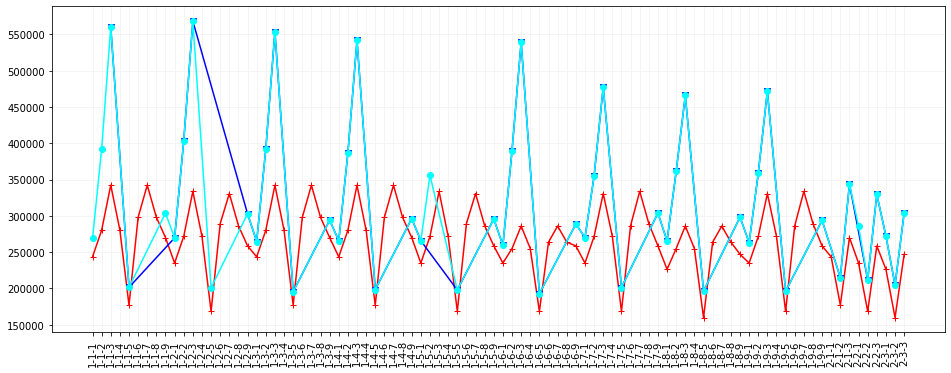

workloadeqhot


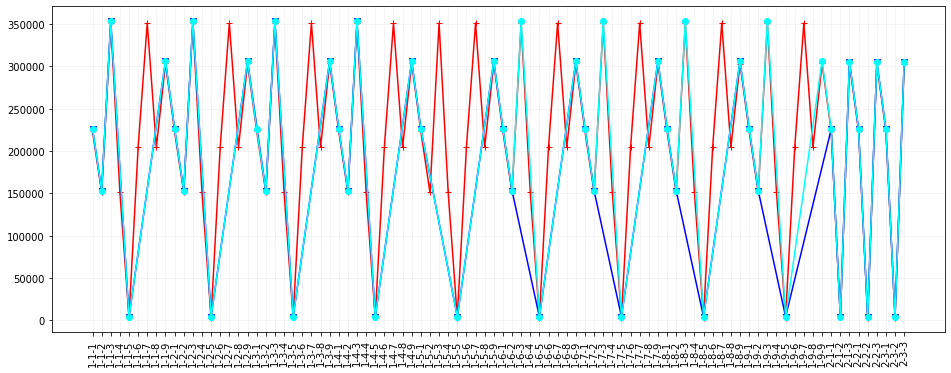

workloadeqclust


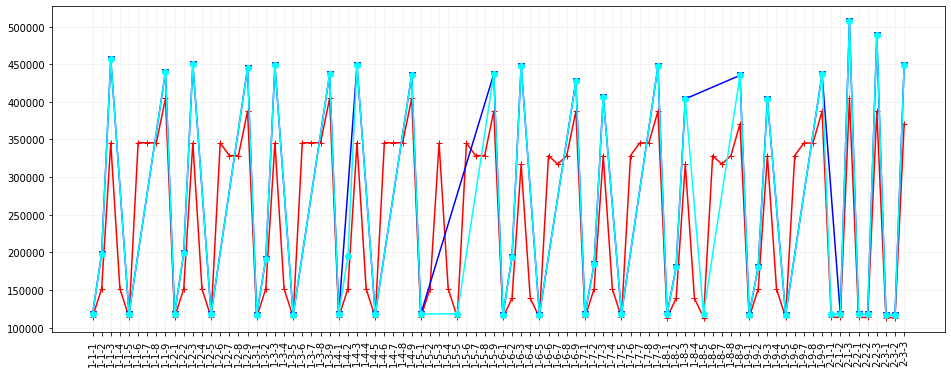

workloadabceq


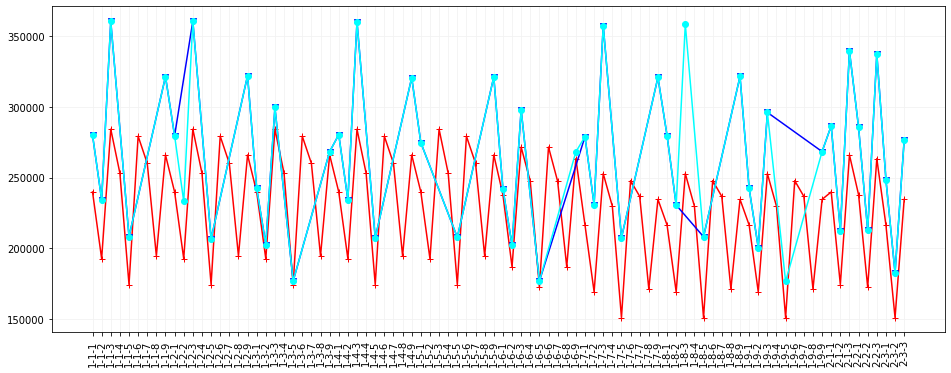

workloadabchot


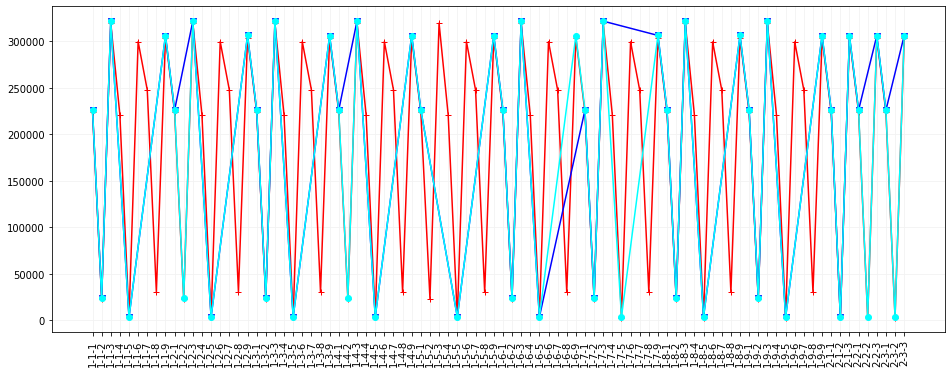

workloadabcclust


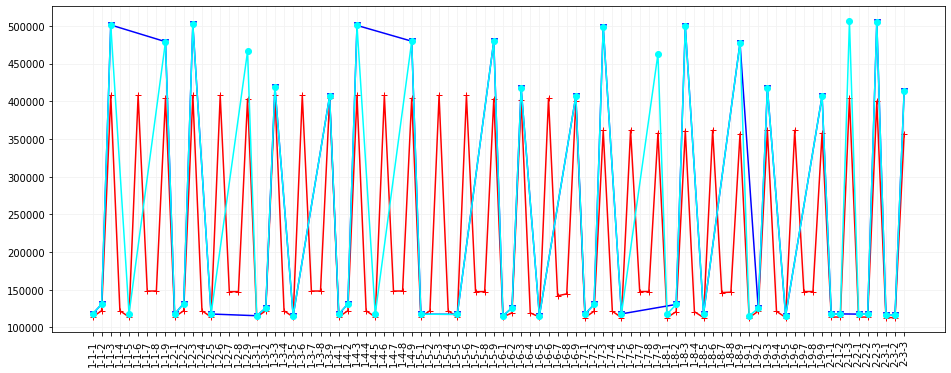

workloadbaceq


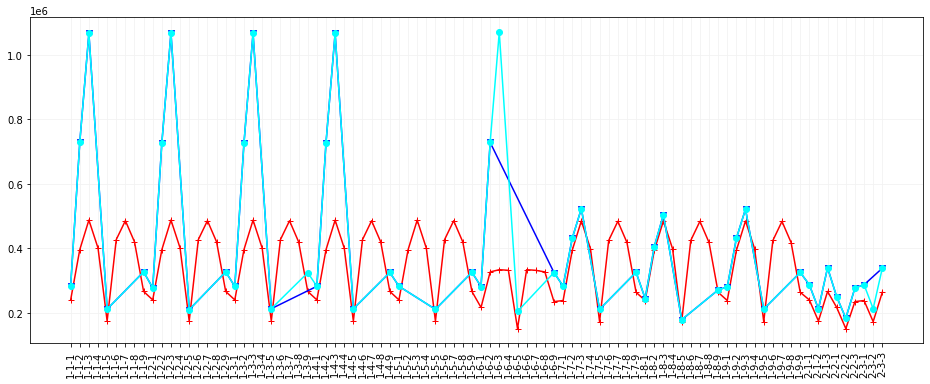

workloadbachot


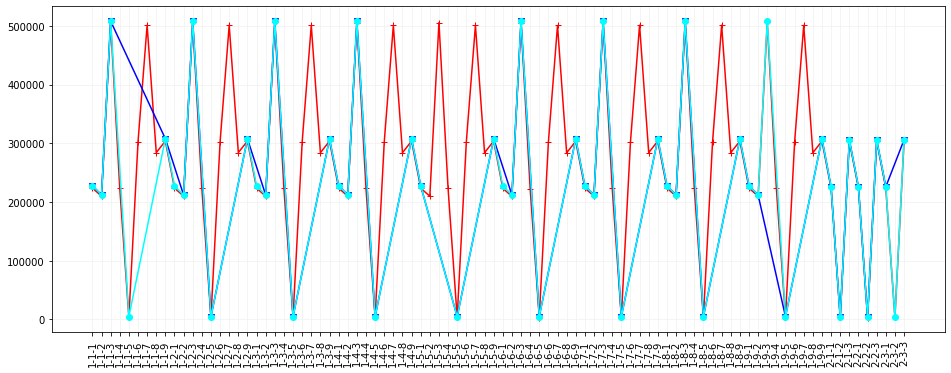

workloadbacclust


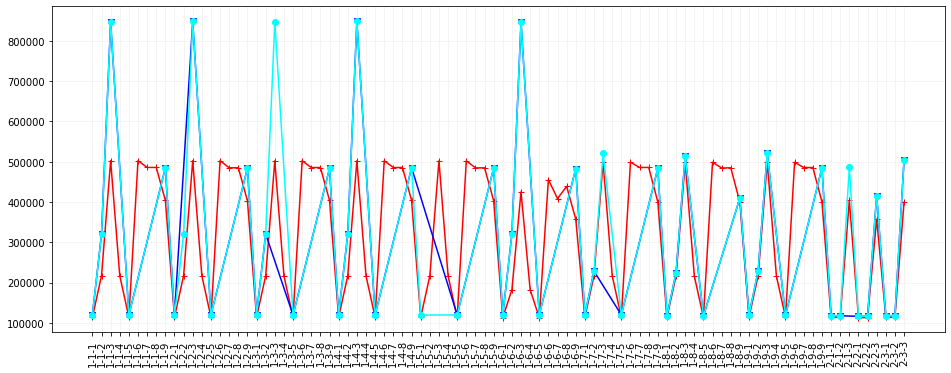

In [7]:
import matplotlib.pyplot as plt
import pylab

for wl in freq:
    print(wl)
    plt.figure(figsize=(16,6))
    plt.plot(list(amd[wl].keys()), list(amd[wl].values()), color='red', marker='+', label='amdahl')
    plt.plot(list(filtered[wl].keys()), list(filtered[wl].values()), color='blue', marker='v', label='experimental results')
    plt.plot(list(unfiltered[wl].keys()), list(unfiltered[wl].values()), color='cyan', marker='o', label='experimental results')
    plt.grid(color='0.95')
    plt.xticks(rotation=90)
#     plt.savefig('plot'+wl+'.eps', format='eps', bbox_inches='tight')
#     plt.savefig('plot'+wl+'.png', bbox_inches='tight')
    plt.show()